In [1]:
import pandas as pd
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('crime.csv', sep=",(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)", engine="python", quoting=csv.QUOTE_NONE, header=0)

# Data Preparation
# Replace NaN with 'N'
df = df.replace({float('nan'):'N'})
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495        N   
1                 PROPERTY - LOST      D14            795        N   
2       THREATS TO DO BODILY HARM       B2            329        N   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92        N   
4              AIRCRAFT INCIDENTS       A7             36        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET      Lat     Long                       Location  
0  ARLINGTON ST  42.2626 -71.1212  "(42.26260773, -71.12118637)"  
1    ALLSTON ST  42.3521 -71.1353  "(42.35211146, -71.13531147)"  
2      DEVON ST  42.3081 -71.0769  "(42.30812619, -71.07692974)"  
3  CAMBRIDGE ST  42.3595 -71.0596  "(42.35945371, -71.05964817)"  
4   PRESCOTT ST  42.3753 -71.0247  "(42.37525782, -71.02466343)"

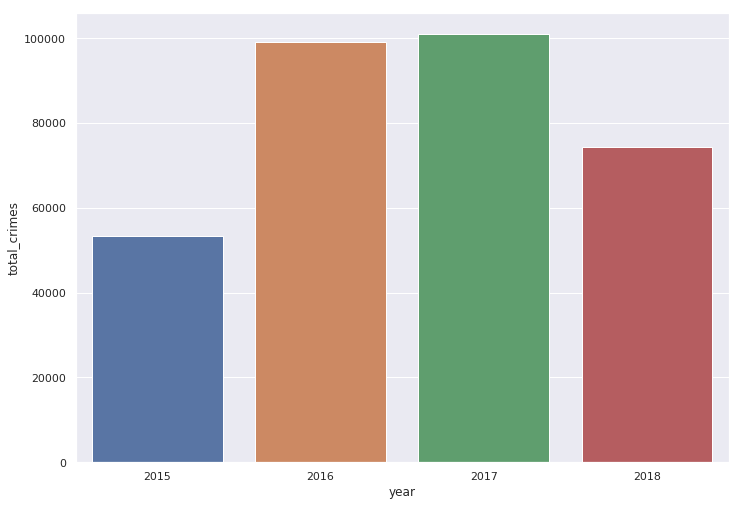

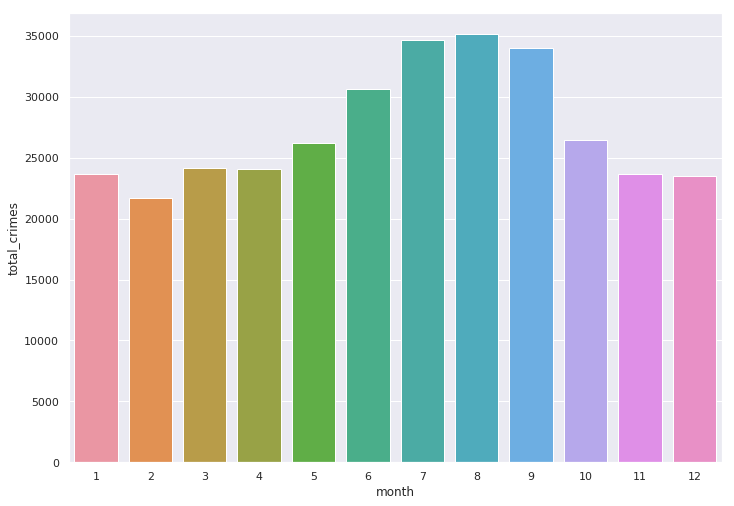

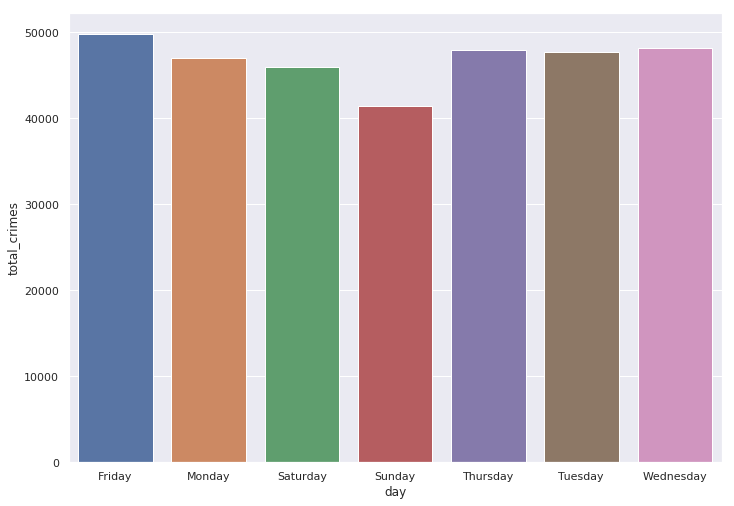

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Per year - month - day
series_year = df.groupby(['YEAR']).size()
series_month = df.groupby(['MONTH']).size()
series_day = df.groupby(['DAY_OF_WEEK']).size()

df_year = pd.DataFrame({'year':series_year.index, 'total_crimes':series_year.values})
df_month = pd.DataFrame({'month':series_month.index, 'total_crimes':series_month.values})
df_day = pd.DataFrame({'day':series_day.index, 'total_crimes':series_day.values})

plot_year = sns.barplot(x="year", y="total_crimes", data=df_year)
plt.show()
plot_month = sns.barplot(x="month", y="total_crimes", data=df_month)
plt.show()
plot_day = sns.barplot(x="day", y="total_crimes", data=df_day)
plt.show()

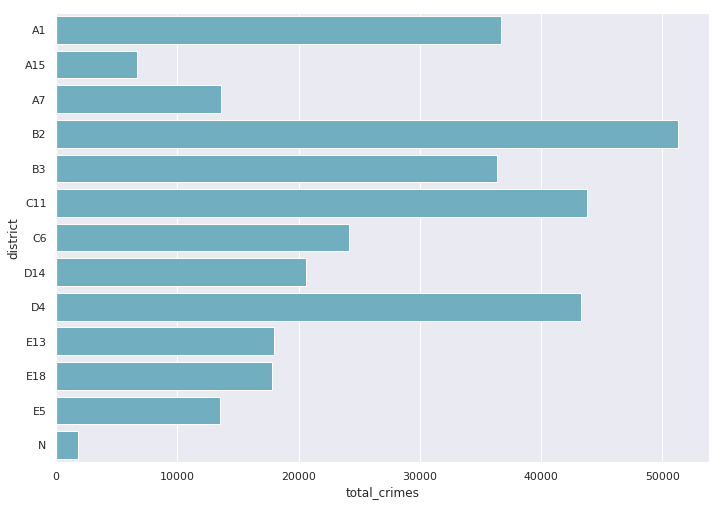

In [3]:
# Per District
series_district = df.groupby(['DISTRICT']).size()
df_district = pd.DataFrame({'district':series_district.index, 'total_crimes':series_district.values})
plot_year = sns.barplot(x="total_crimes", y="district", data=df_district, color="c")
plt.show()

In [4]:
#YEAR WITH MOST SHOOTING INCIDENTS
series_shooting_per_year = df.groupby(['SHOOTING','YEAR']).size()
print(series_shooting_per_year['Y'].idxmax())

#DISTRICT WITH MOST SHOOTING INCIDENTS
series_shooting_per_district = df.groupby(['SHOOTING','DISTRICT']).size()
print(series_shooting_per_district['Y'].idxmax())

2017
B2


In [5]:
#CRIMES PER DAYTIME AND PER NIGHT TIME
df['DAY_OR_NIGHT'] = df['HOUR'].map(lambda x: 'N' if x >= 18 or x < 6 else 'D')
series_day_or_night = df.groupby(['DAY_OR_NIGHT']).size()
pd.DataFrame({'day / night':series_day_or_night.index, 'total crimes':series_day_or_night.values})


day / night  total crimes
0           D        189442
1           N        138378

In [6]:
#MOST COMMON OFFENSE CODE DURING DAYTIME
series_offense_code_time = df.groupby(['DAY_OR_NIGHT','OFFENSE_CODE_GROUP']).size()
print(series_offense_code_time['D'].idxmax())


Motor Vehicle Accident Response


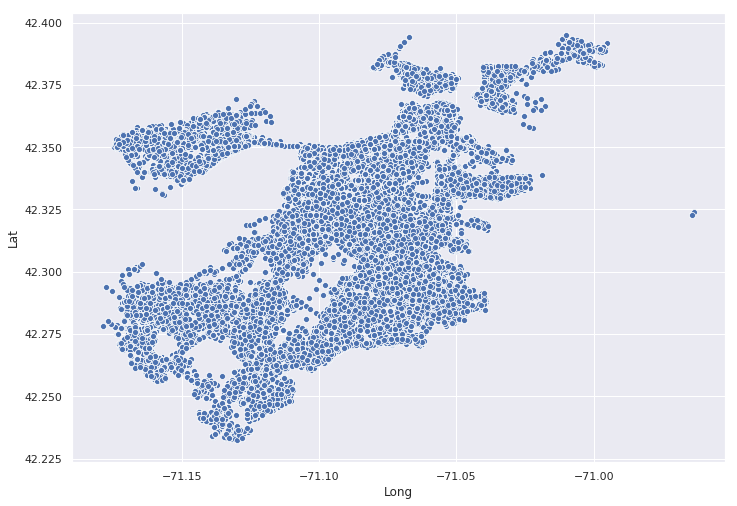

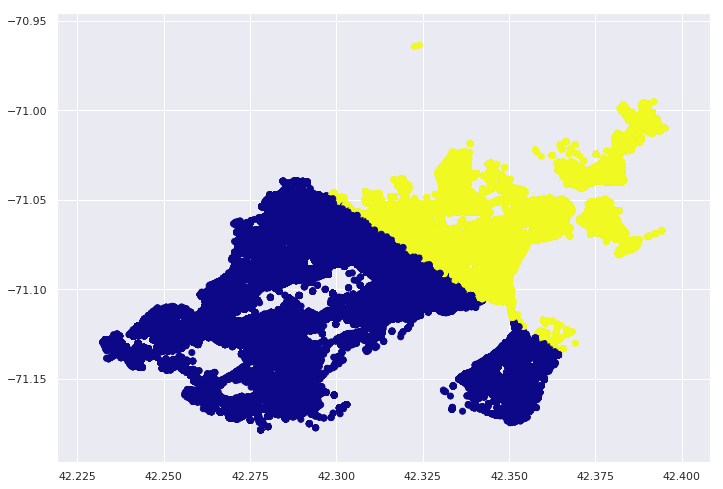

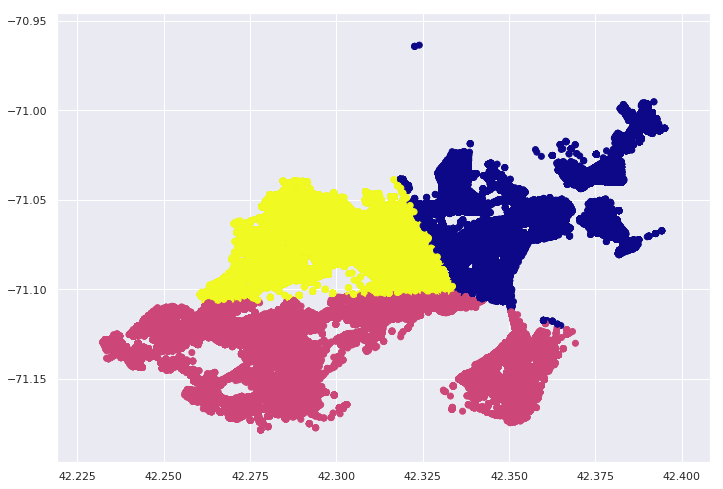

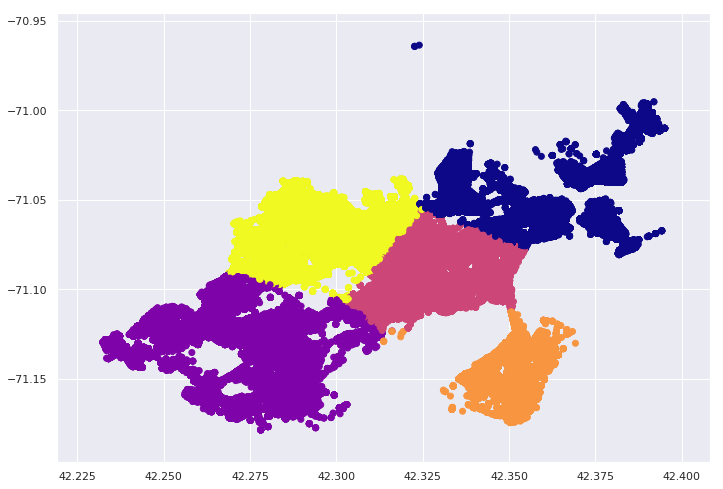

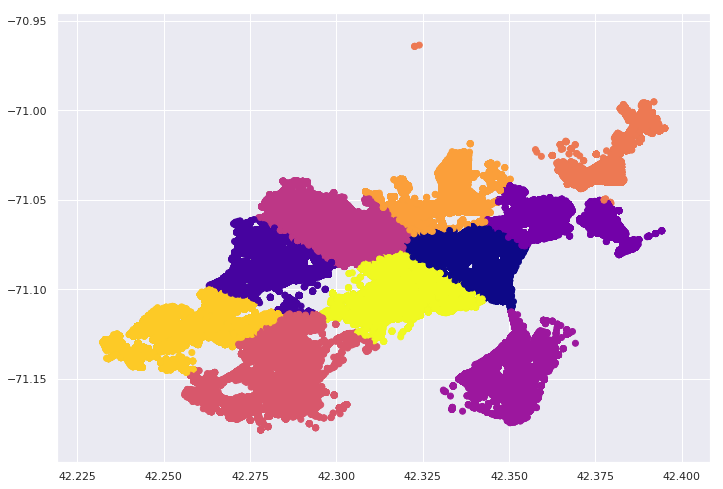

In [7]:
#K-MEANS
from sklearn.cluster import KMeans
import numpy as np

X = df[['Lat', 'Long']]
X = X[X.Lat != 'N']
X = X.loc[(X['Lat'] > 40) & (X['Long'] < -60)]
sns.scatterplot(x="Long", y="Lat",data = X)
plt.show()

#KMeans Clusters=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X.values)
kmeans.predict(X.values)
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_.astype(float), cmap = "plasma")
plt.show()

#KMeans Clusters=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X.values)
kmeans.predict(X.values)
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_.astype(float), cmap = "plasma")
plt.show()

#KMeans Clusters=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X.values)
kmeans.predict(X.values)
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_.astype(float), cmap = "plasma")
plt.show()

#KMeans Clusters=10
kmeans = KMeans(n_clusters=10)
kmeans.fit(X.values)
kmeans.predict(X.values)
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_.astype(float), cmap = "plasma")
plt.show()

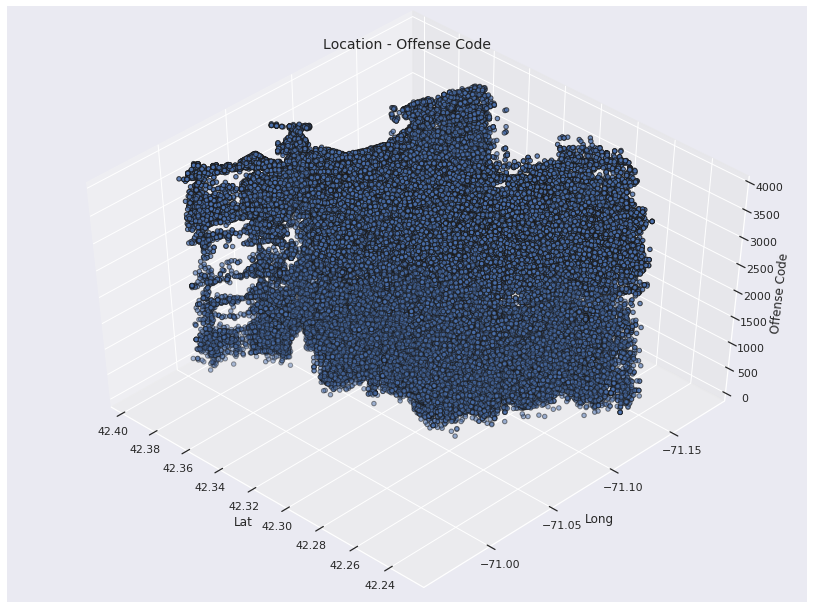

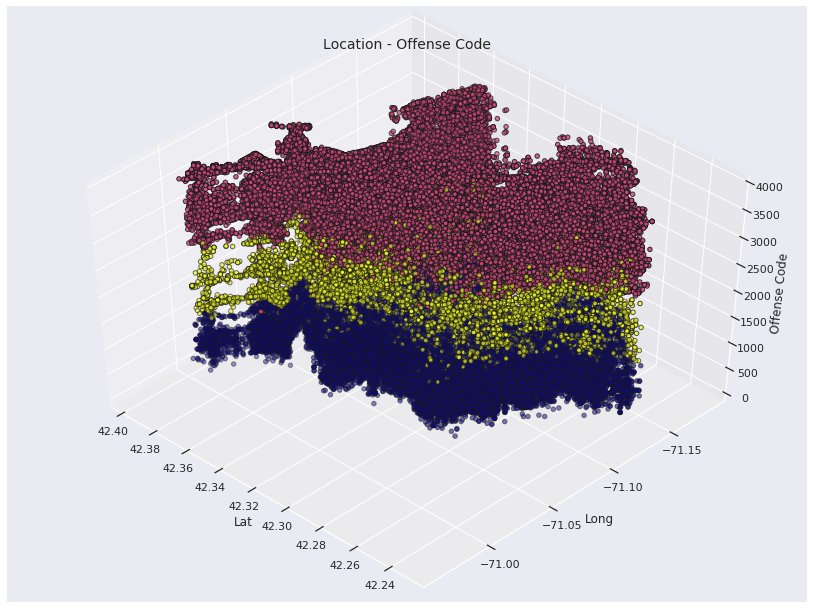

In [8]:
#Kmeans location,offense code
from mpl_toolkits.mplot3d import Axes3D

X = df[['Lat', 'Long', 'OFFENSE_CODE']]
X = X[X.Lat != 'N']
X = X.loc[(X['Lat'] > 40) & (X['Long'] < -60)]
fig = plt.figure(1, figsize=(11.7,8.27))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.values[:, 0], X.values[:, 1], X.values[:, 2], edgecolor='k')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Offense Code')
plt.title("Location - Offense Code", fontsize=14)
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X.values)
kmeans.predict(X.values)

fig = plt.figure(2, figsize=(11.7,8.27))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.values[:, 0], X.values[:, 1], X.values[:, 2], c=kmeans.labels_.astype(float), cmap = "plasma", edgecolor='k')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Offense Code')
plt.title("Location - Offense Code", fontsize=14)
plt.show()

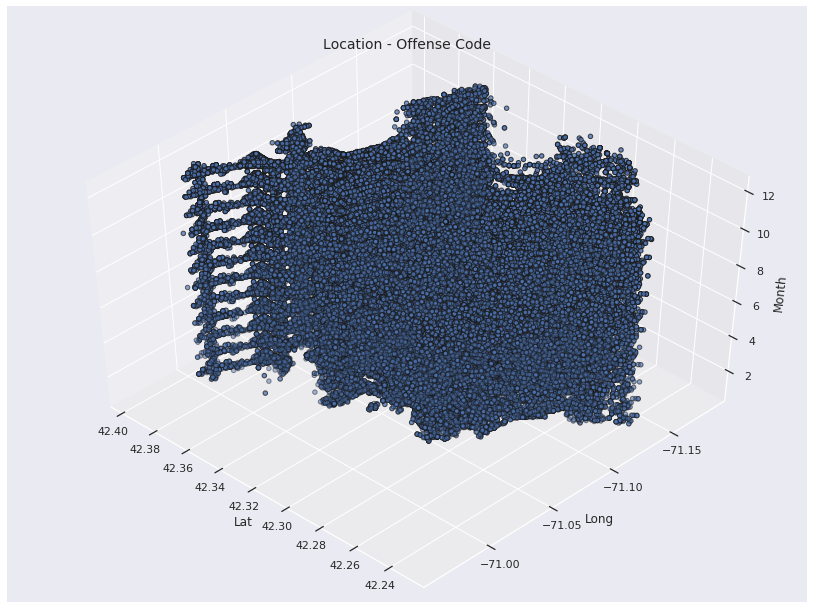

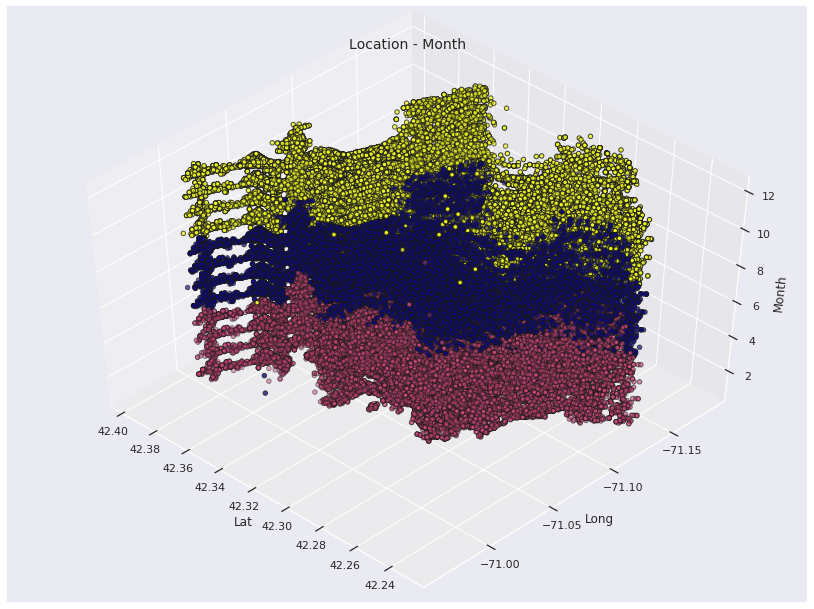

In [9]:
#Kmeans location,month
from mpl_toolkits.mplot3d import Axes3D

X = df[['Lat', 'Long', 'MONTH']]
X = X[X.Lat != 'N']
X = X.loc[(X['Lat'] > 40) & (X['Long'] < -60)]
fig = plt.figure(1, figsize=(11.7,8.27))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.values[:, 0], X.values[:, 1], X.values[:, 2], edgecolor='k')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Month')
plt.title("Location - Offense Code", fontsize=14)
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X.values)
kmeans.predict(X.values)

fig = plt.figure(2, figsize=(11.7,8.27))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.values[:, 0], X.values[:, 1], X.values[:, 2], c=kmeans.labels_.astype(float), cmap = "plasma", edgecolor='k')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Month')
plt.title("Location - Month", fontsize=14)
plt.show()

In [45]:
import folium
import os
from folium.plugins import MarkerCluster

#Select offense_code_group
code_group_df = df.loc[df['OFFENSE_CODE_GROUP'] == "Drug Violation"]
code_group_df = code_group_df[code_group_df.Lat != 'N']
code_group_df = code_group_df.loc[(code_group_df['Lat'] > 40) & (code_group_df['Long'] < -60)]
if (len(code_group_df.index) >5000):
    code_group_df = code_group_df.iloc[:(5000-len(code_group_df.index))]
len(code_group_df.index)

5000

In [46]:

lat_df = code_group_df['Lat']
long_df = code_group_df['Long']
location_df = code_group_df[['Lat', 'Long']]



icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html: '<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconSize: new L.Point(20, 20)
    });
}"""


popups = ['lon:{}<br>lat:{}'.format(lon, lat) for (lat, lon) in location_df.values]

m = folium.Map(
    #location=[np.mean(lat_df.values), np.mean(long_df.values)],
    location = [40,58],
    tiles='Cartodb Positron',
    zoom_start=1
)

marker_cluster = MarkerCluster(
    locations=location_df.values, popups=popups,
    name='1000 clustered icons',
    overlay=True,
    control=True,
    icon_create_function=icon_create_function
)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)

#m.save(os.path.join('results', '1000_MarkerCluster1.html'))

m